In [1]:
import sys
sys.path.append("/home/kelvin/src/minivnatiny")

import minivnatiny
import numpy as np
import skrf
import matplotlib.pyplot as plt

vna = minivnatiny.VNA("/dev/ttyUSB0")

scan 0 finished
scan 1 finished
scan 2 finished
scan 3 finished
scan 4 finished
scan 5 finished
scan 6 finished
scan 7 finished
scan 8 finished
scan 9 finished
scan 10 finished
scan 11 finished
scan 12 finished
scan 13 finished
scan 14 finished
scan 15 finished
scan 16 finished
scan 17 finished
scan 18 finished
scan 19 finished


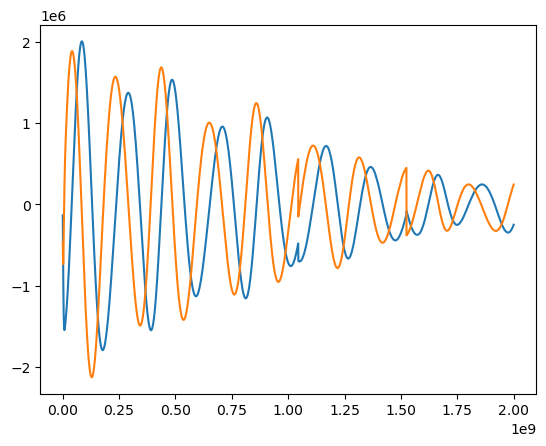

In [3]:
iq_short_tot = np.zeros(5000, dtype=np.complex128)
num_scans = 20

for i in range(num_scans):
    freqs, iq_short = vna.raw_iq_refl(1e+6, 2e+9, 5000)
    print("scan {} finished".format(i))
    iq_short_tot += iq_short

iq_short_avg = iq_short_tot/num_scans
plt.plot(freqs, np.real(iq_short_avg))
plt.plot(freqs, np.imag(iq_short_avg))
plt.show()

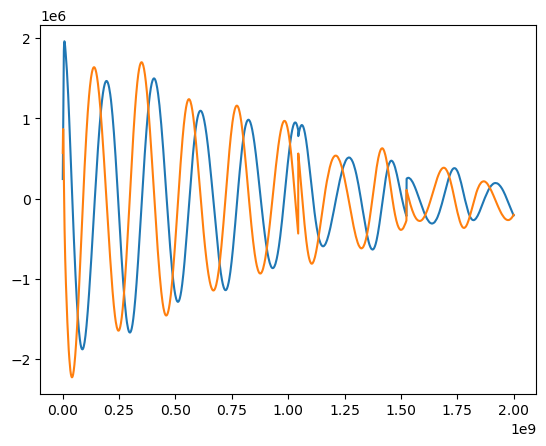

In [9]:
iq_tot = np.zeros(5000, dtype=np.complex128)
num_scans = 5

for i in range(num_scans):
    freqs, iq = vna.raw_iq_refl(1e+6, 2e+9, 5000)
    #print("scan {} finished".format(i))
    iq_tot += iq

iq_open_avg = iq_tot/num_scans
plt.plot(freqs, np.real(iq_open_avg))
plt.plot(freqs, np.imag(iq_open_avg))
plt.show()

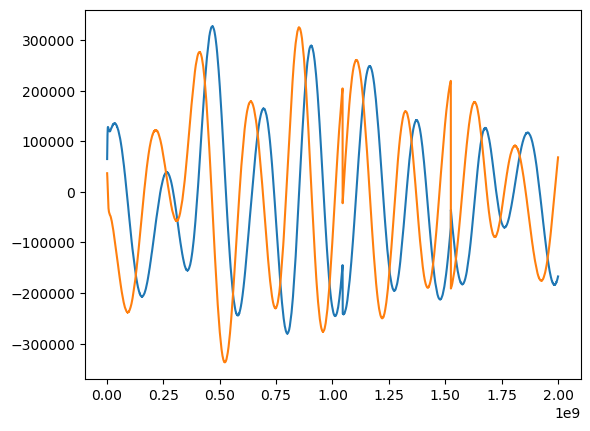

In [10]:
iq_tot = np.zeros(5000, dtype=np.complex128)
num_scans = 20

for i in range(num_scans):
    freqs, iq = vna.raw_iq_refl(1e+6, 2e+9, 5000)
    #print("scan {} finished".format(i))
    iq_tot += iq

iq_load_avg = iq_tot/num_scans
plt.plot(freqs, np.real(iq_load_avg))
plt.plot(freqs, np.imag(iq_load_avg))
plt.show()

In [13]:
cal = minivnatiny.SOLCalibration(freqs, iq_short_avg, iq_open_avg, iq_load_avg)
cal_vna = minivnatiny.CalibratedVNA(vna, cal)

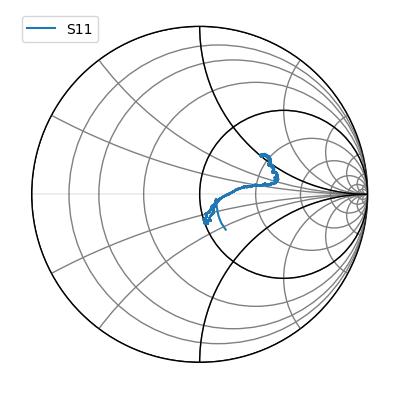

In [22]:
net = cal_vna.scan_s11(1e+6, 2e+9, 5000)
net.plot_s_smith()
plt.show()

In [21]:
np.save("freqs", freqs)
np.save("iq_short", iq_short_avg)
np.save("iq_open", iq_open_avg)
np.save("iq_load", iq_load_avg)